In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [67]:
df = pd.read_csv(r"C:\Users\dell\Jupyter Notebooks\diamonds.csv\diamonds.csv")

In [68]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [69]:
df.drop("Unnamed: 0",axis = 1, inplace= True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [71]:
X = df.drop('price',axis = 1)
y = df['price']

In [72]:
cont_cols = X.select_dtypes(exclude = 'object').columns
cat_cols = X.select_dtypes(include = 'object').columns

In [73]:
cont_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [74]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

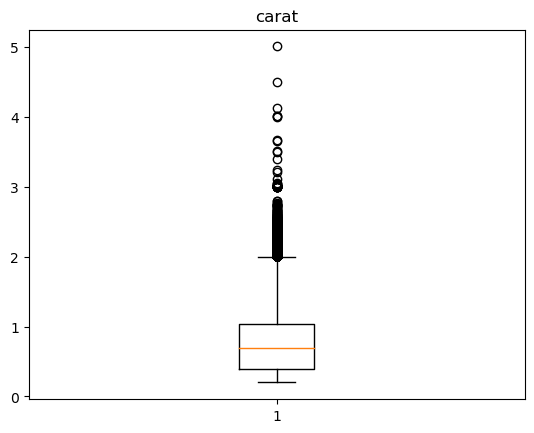

**************************************


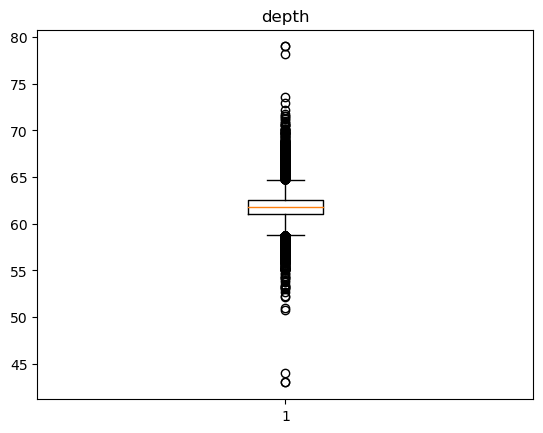

**************************************


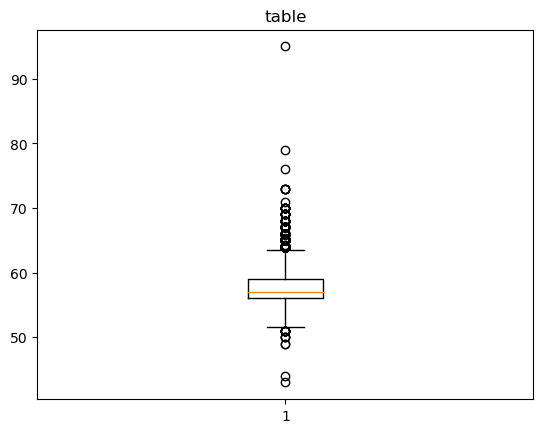

**************************************


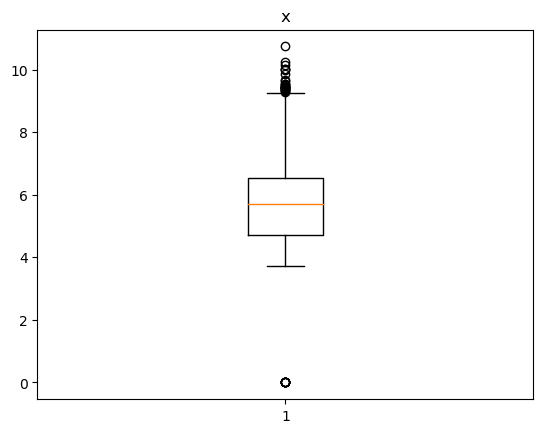

**************************************


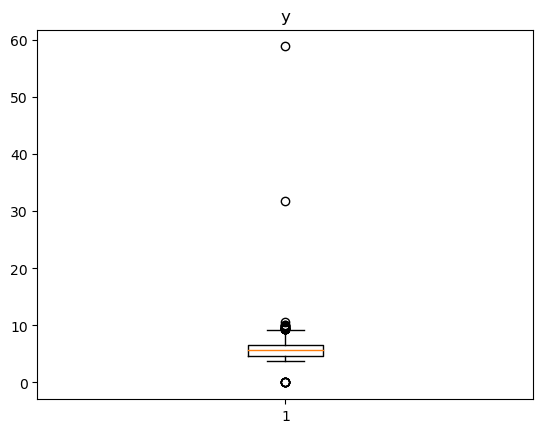

**************************************


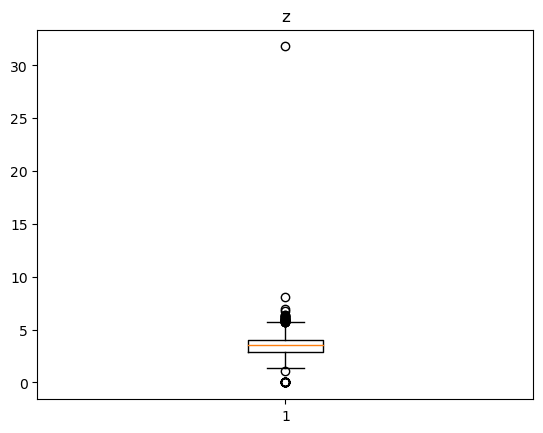

**************************************


In [75]:
for i in cont_cols:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    print("**************************************")

In [76]:
## Create pipelines for cont_cols, cat_nominal, cat_ordinal

In [77]:
cont_pl = Pipeline(steps=[('Scaling',RobustScaler()),
                         ('Transformation', PowerTransformer(standardize=False))])

cat_nominal_pl = Pipeline(steps = [('OneHotEncoding',OneHotEncoder(drop = 'first',sparse_output = False))])

In [78]:
cat_ordinal_pl = Pipeline(steps = [("Ordinal Encoding",OrdinalEncoder())])

In [57]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [79]:
ct = ColumnTransformer(transformers=[('Cont Col transform',cont_pl,[0,4,5,6,7,8]),
                                    ('Nominal Col transform',cat_nominal_pl,[2,3]),
                                    ('Ordinal Col transform',cat_ordinal_pl,[1])],remainder = 'passthrough')

In [26]:
cat_cols.values[1:3]

array(['color', 'clarity'], dtype=object)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [34]:
X_train_transformed = pd.DataFrame(ct.fit_transform(X_train),columns = ct.get_feature_names_out(),index = X_train.index)

In [35]:
X_train_transformed

,Cont Col transform__carat,Cont Col transform__depth,Cont Col transform__table,Cont Col transform__x,Cont Col transform__y,Cont Col transform__z,Nominal Col transform__color_E,Nominal Col transform__color_F,Nominal Col transform__color_G,Nominal Col transform__color_H,Nominal Col transform__color_I,Nominal Col transform__color_J,Nominal Col transform__clarity_IF,Nominal Col transform__clarity_SI1,Nominal Col transform__clarity_SI2,Nominal Col transform__clarity_VS1,Nominal Col transform__clarity_VS2,Nominal Col transform__clarity_VVS1,Nominal Col transform__clarity_VVS2,Ordinal Col transform__cut
19497,0.578884,-0.331036,0.000000,0.596779,0.563360,0.556281,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
31229,-0.804312,0.133725,-0.355630,-0.824679,-0.868512,-0.823945,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
22311,0.578884,0.403281,0.000000,0.520738,0.545967,0.563501,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
278,0.158077,0.538978,-0.751523,0.117943,0.133741,0.162637,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
6646,0.131213,-0.066567,-0.355630,0.128391,0.128550,0.120848,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.432258,0.403281,0.593693,0.395914,0.402399,0.423353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
44732,-0.426980,-0.527765,-0.751523,-0.395119,-0.421287,-0.449714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
38158,-0.753521,-0.982456,0.312823,-0.749062,-0.796475,-0.835085,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
860,0.270384,0.675219,0.593693,0.225579,0.169741,0.244271,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [36]:
X_test_transformed = pd.DataFrame(ct.transform(X_test),columns = ct.get_feature_names_out(),index = X_test.index)

In [37]:
X_test_transformed

,Cont Col transform__carat,Cont Col transform__depth,Cont Col transform__table,Cont Col transform__x,Cont Col transform__y,Cont Col transform__z,Nominal Col transform__color_E,Nominal Col transform__color_F,Nominal Col transform__color_G,Nominal Col transform__color_H,Nominal Col transform__color_I,Nominal Col transform__color_J,Nominal Col transform__clarity_IF,Nominal Col transform__clarity_SI1,Nominal Col transform__clarity_SI2,Nominal Col transform__clarity_VS1,Nominal Col transform__clarity_VS2,Nominal Col transform__clarity_VVS1,Nominal Col transform__clarity_VVS2,Ordinal Col transform__cut
1388,-0.990261,0.200865,-0.355630,-1.116337,-1.137047,-1.097739,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
50052,-0.205864,-1.175760,0.000000,-0.147077,-0.166351,-0.250413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
41645,-0.583916,0.200865,-0.751523,-0.568411,-0.600925,-0.563964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
42377,-0.515109,-0.658253,0.000000,-0.464804,-0.500015,-0.532489,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
17244,0.830218,0.335651,-0.751523,0.818841,0.771795,0.820032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,-0.560722,-0.396754,0.593693,-0.555317,-0.546765,-0.574507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
12564,0.442124,0.811962,-0.751523,0.400633,0.369862,0.445915,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
24786,0.803941,-0.658253,0.851472,0.810566,0.775808,0.745789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1332,0.015499,-1.878141,1.091508,0.054320,0.102404,-0.080957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [38]:
X_train_transformed.shape,X_test_transformed.shape

((37758, 20), (16182, 20))

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
mae_lr = mean_absolute_error(y_test,y_pred)
mse_lr = mean_squared_error(y_test,y_pred)

In [45]:
mae_lr,mse_lr

(1341.4734214735076, 3199183.1161023043)

In [46]:
dt = DecisionTreeRegressor()
dt.fit(X_train_transformed,y_train)
y_pred = dt.predict(X_test_transformed)
mae_dt = mean_absolute_error(y_test,y_pred)
mse_dt = mean_squared_error(y_test,y_pred)
mae_dt,mse_dt

(386.5994623655914, 689675.3066524534)

In [47]:
rfr = RandomForestRegressor()
rfr.fit(X_train_transformed,y_train)
y_pred = rfr.predict(X_test_transformed)
mae_rfr = mean_absolute_error(y_test,y_pred)
mse_rfr = mean_squared_error(y_test,y_pred)
mae_rfr,mse_rfr

(295.19257441273174, 385245.48732328526)

In [48]:
knn = KNeighborsRegressor()
knn.fit(X_train_transformed,y_train)
y_pred = knn.predict(X_test_transformed)
mae_knn = mean_absolute_error(y_test,y_pred)
mse_knn = mean_squared_error(y_test,y_pred)
mae_knn,mse_knn

(499.4801013471759, 1000405.2760771227)

In [80]:
final_pl = Pipeline(steps = [('Preprocessing',ct),
                             ('Estimator',dt)])

In [81]:
final_pl.fit(X_train,y_train)
y_pred_pl = final_pl.predict(X_test)

In [88]:
final_pl[0].get_feature_names_out()

array(['Cont Col transform__carat', 'Cont Col transform__depth',
       'Cont Col transform__table', 'Cont Col transform__x',
       'Cont Col transform__y', 'Cont Col transform__z',
       'Nominal Col transform__color_E', 'Nominal Col transform__color_F',
       'Nominal Col transform__color_G', 'Nominal Col transform__color_H',
       'Nominal Col transform__color_I', 'Nominal Col transform__color_J',
       'Nominal Col transform__clarity_IF',
       'Nominal Col transform__clarity_SI1',
       'Nominal Col transform__clarity_SI2',
       'Nominal Col transform__clarity_VS1',
       'Nominal Col transform__clarity_VS2',
       'Nominal Col transform__clarity_VVS1',
       'Nominal Col transform__clarity_VVS2',
       'Ordinal Col transform__cut'], dtype=object)

In [91]:
import pickle
pickle.dump(final_pl,open('dt.pkl','wb'))

In [92]:
pr = pickle.load(open('dt.pkl','rb'))

In [93]:
pr

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Cont Col transform',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler()),
                                                                  ('Transformation',
                                                                   PowerTransformer(standardize=False))]),
                                                  [0, 4, 5, 6, 7, 8]),
                                                 ('Nominal Col transform',
                                                  Pipeline(steps=[('OneHotEncoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [2, 3]),
                                                 ('Ordinal Col transform',
                                                  Pipeline(steps=[('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder())]),
                                                  [1])])),
                ('Estimator', DecisionTreeRegressor())])

In [94]:
pr.predict([[0.23,'Ideal','E','SI2',61.5,55.0,3.95,3.98,2.43]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([326.])